# Case study: Which promotion design was the most successful?
---

Reading the future is impossible; it's also unlikely to know which marketing strategy would have been more successful if we hadn't collected the data. However, it's possible to test the hypothesis and split the customers into $control$ and $treatment$ groups to test whether a specific thing increased the revenue. This notebook tackles this exact problem using various tools as:
- Frequentist statistics: t-test, t-value, and p-value
- Bayesian statistics: inference, likelihood, posterior probability


### Table of content
- [Dataset](#dataset)
- [Exploratory Data Analysis](#eda)
- [Frequentist statistics](#freq)
- [Bayesian statistics](#bayesian)
- [Results](#results)

In [20]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pymc3
from utils import viz

sns.set()

### Dataset <a class="anchor" id="dataset"/>


- MarketID: unique identifier for market
- MarketSize: size of market area by sales
- LocationID: unique identifier for store location
- AgeOfStore: age of store in years
- Promotion: one of three promotions that was tested
- week: one of four weeks when the promotions were run
- SalesInThousands: sales amount for specific LocationID, Promotion, and week

In [21]:
df = pd.read_csv('data/data.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [22]:
print(f'The dataset has {len(df)} values')
print(f'There are {df.isnull().any().sum()} missing values')
print(f'There are {df[df.duplicated()].count().sum()} duplicated values')

The dataset has 548 values
There are 0 missing values
There are 0 duplicated values


In [23]:
for col in df.columns:
    print(f'{col} has {df[col].nunique()} unique values')

MarketID has 10 unique values
MarketSize has 3 unique values
LocationID has 137 unique values
AgeOfStore has 25 unique values
Promotion has 3 unique values
week has 4 unique values
SalesInThousands has 517 unique values


### Exploratory Data Analysis <a class="anchor" id="eda"/>



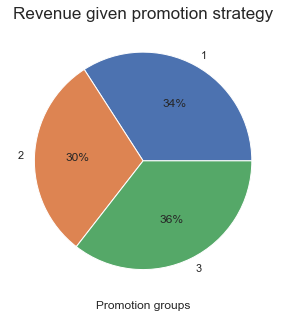

In [24]:
# look into revenue distributions
revenue = df.groupby('Promotion').sum()['SalesInThousands']
ax = revenue.plot.pie(
    figsize=(7, 5),
    autopct='%1.0f%%')

# set axis & title
ax.set_xlabel('Promotion groups')
ax.set_ylabel('')
ax.set_title('Revenue given promotion strategy', fontsize=17)

plt.show()

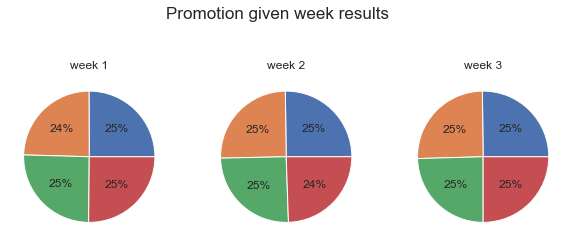

In [49]:
# distribution of promotions and weeks
promotion_vs_week = df.groupby(['Promotion', 'week']).sum()['SalesInThousands'].unstack('week')

fig, ax = plt.subplots(1, 3, figsize=(10, 7))
fig.suptitle('Promotion given week results',
             fontsize=17, y=0.8)

for idx, row in enumerate(promotion_vs_week.index):
    ax[idx].pie(promotion_vs_week.iloc[idx, :], autopct='%1.0f%%')
    ax[idx].set_title(f'week {row}')

plt.show()

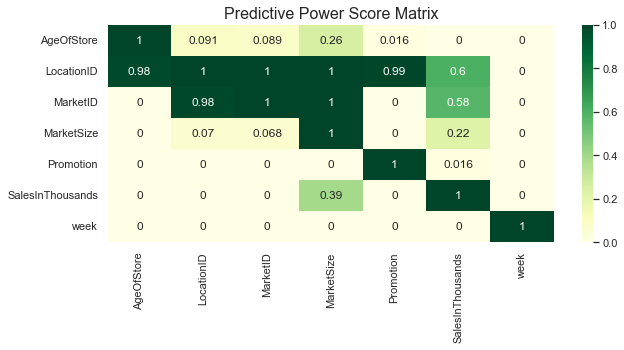

In [10]:
viz.pps_matrix(df)